In [78]:
import os

In [79]:
# to check if the dataset is present in the working directory
os.listdir()

['.ipynb_checkpoints', 'housingData-Real.csv', 'Untitled.ipynb']

In [80]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [103]:
# reading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Afsaan/Data-Science/master/Linear%20Regression/housing/housingData-Real.csv")

In [104]:
df=pd.DataFrame(data)

In [105]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [84]:
#first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [85]:
#converting the date object column from object to Datetime
df['date']=pd.to_datetime(df['date'])

In [86]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [87]:
#dropping the unwanted column
df.drop(['id','date'],axis=1,inplace=True)

In [88]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Univariate Linear Regression

finding the best fit model with only one dependent variable and try to predict the model (ie. Univariate Linear Regression)

In [89]:
# selecting the column sqft_living
X = df.sqft_living
Y =df.price

In [90]:
#converting into 2d array
X=np.array(X).reshape(-1,1)
Y=np.array(Y).reshape(-1,1)

In [91]:
#splitting into training and testing dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=101)

In [92]:
model1 = LinearRegression()
model1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
#predicting the value of y
Y_pred = model1.predict(X_test)

In [100]:
# evaltion metric to check how close the prdicted value is
a=r2_score(Y_test,Y_pred)
a

0.5185480212648037

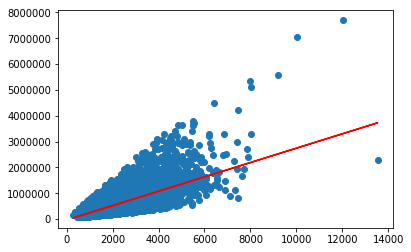

In [98]:
#graphical representation of training varibale
plt.scatter(X_train,Y_train)
plt.plot(X_train ,model1.predict(X_train),color='red' )

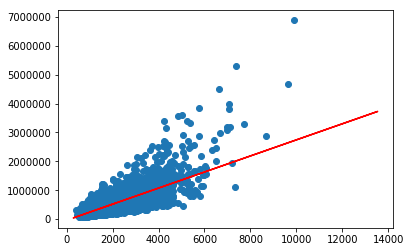

In [99]:
#graphical representation of testing dataset
plt.scatter(X_test,Y_test)
plt.plot(X_train ,model1.predict(X_train) ,color='red')

# Multiple Regression


In [31]:
#splitting into training and testing dataset
x=df.drop(['price'],axis=1)
y=df.price

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101)

In [60]:
models=LinearRegression()
model = models.fit(x_train,y_train)

In [61]:
y_predict = models.predict(x_test)

In [101]:
b=r2_score(y_test,y_predict)
b

0.7097583909083975

In [102]:
print("r2 score of the Univariate linear Regression is : {}".format(a))
print("r2 score of the Multiple linear Regression is : {}".format(b))

r2 score of the Univariate linear Regression is : 0.5185480212648037
r2 score of the Multiple linear Regression is : 0.7097583909083975


as you can see that the r2 score of the multiple regression is more as compared to the univariate linear regression